## Testing HCF Model

#### Obtain refractive index

/Users/jackmorse/Documents/University/Year 4/FYP/Modules/Refractive_Indices
j1nz is
3.8317059702075125


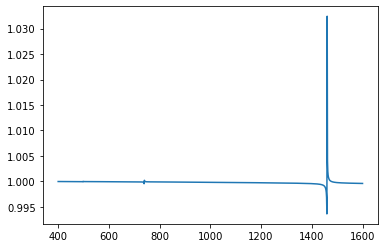

In [1]:
import os
import sys

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
add_to_path = os.path.join(parent_directory, "Modules/Refractive_Indices")
os.listdir(parent_directory)
print(add_to_path)
sys.path.append(add_to_path)
import RefractiveIndexClass
import numpy as np
import matplotlib.pyplot as plt

wavelengths = np.linspace(400, 1600, 1000)
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, part="R")
plt.plot(wavelengths, index)

#### Obtain the GVD

Recall the GVD is: $$\frac{d^2 \beta}{d \omega^2}$$
We will give arguments wavelengths in nm and refractive index. We will have to perform the CDA to obtain the second derivative.

In [2]:
def CDA2(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf
    
    ! Step size must be the same as the grid step. !
    '''
    second_derivative = []
    last_point = len(func_vals) - 1
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[0] - 5 * func_vals[1] + 4 * func_vals[2] - func_vals[3]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[2] - 2 * func_vals[1] + func_vals[0])) # If the FDA ever fails use these.
    for i in range(1, last_point):
        second_derivative.append((1 / (step_size**2)) * (func_vals[i + 1] + func_vals[i - 1] - 2 * func_vals[i]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[last_point] - 2 * func_vals[last_point - 1] + func_vals[last_point - 2])) # If the BDA ever fails use these.
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[last_point] - 5 * func_vals[last_point - 1] + 4 * func_vals[last_point - 2] - func_vals[last_point - 3]))
    return second_derivative

def CDA1(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

    ! Step size must be the same as the grid step. !
    '''
    first_derivative = []
    last_point = len(func_vals) - 1
    first_derivative.append((1 / (2 * step_size)) * (-3 * func_vals[0] + 4 * func_vals[1] - func_vals[2] - func_vals[3]))
    for i in range(1, last_point):
        first_derivative.append((1 / (2 * step_size)) * (func_vals[i + 1] - func_vals[i - 1]))
    # first_derivative.append((1 / (step_size)) * (func_vals[last_point] - func_vals[last_point - 1]))
    first_derivative.append((1 / (2 * step_size)) * (3 * func_vals[last_point] - 4 * func_vals[last_point - 1] + func_vals[last_point - 2]))
    return first_derivative

[-1.7851609399329568e-06, 2.1079391172640447e-07, 1.5941289574309014e-06, 6.534611263518539e-06, 1.8984626674859083e-05, 4.447751537427029e-05, 9.01275718825201e-05, 0.00016463004505831965, 0.00027826113809833515, 0.00044287800853717104, 0.0006719187682473938, 0.0009804024834394985, 0.0013849291746619312, 0.0019036798168011447, 0.0025564163390814267, 0.00336448162506512, 0.004350799512652432, 0.0055398747940816045, 0.006957793215928722, 0.008632221479107817, 0.01059240723887123, 0.012869179104808597, 0.015494946640848052, 0.018503700365255355, 0.021931011750634163, 0.025814033223927012, 0.030191498166412783, 0.03510372091370962, 0.04059259675577285, 0.04670160193689566, 0.05347579365571128, 0.0609618100651873, 0.06920787027263207, 0.0782637743396905, 0.0881809032823451, 0.0990122190709203, 0.11081226463007193, 0.12363716383879882, 0.13754462153043515, 0.1525939234926527, 0.168845936467468, 0.18636310815122664, 0.20520946719461047, 0.22545062320264844, 0.24715376673470948, 0.27038766930

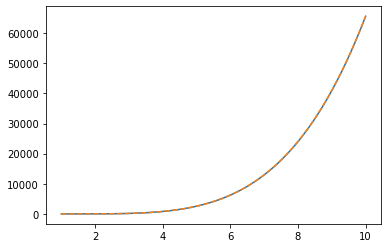

In [3]:
x = np.linspace(1, 10, 1000)
def y(x):
    return 2*(x-1)**5
y(x)[1000 - 1]


ypp = CDA1(y(x), step_size=x[1] - x[0])
print(ypp)
import matplotlib.pyplot as plt 
len(ypp)
plt.plot(x, ypp)
plt.plot(x, 2*5*(x-1)**4, '--')

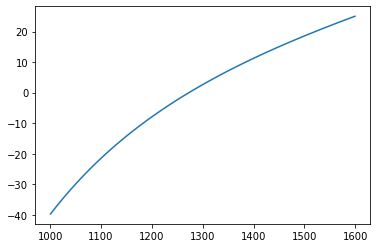

In [4]:
def beta_lambda(refractive_index, wavelengths):
    beta = []
    for i in range(len(refractive_index)):
        beta.append(2 * np.pi * refractive_index[i] / wavelengths[i])
    return beta

def GVD_lambda(beta, wavelengths, output_ps_nm_km = True):
    '''
    GVD which is expressed as beta_2 * (-2 pi c / lambda**2). Sometimes denoted D.

    Parameters
    -------
    beta ([float]]): Array of beta values in nm^-1
    wavelengths ([float]): Array of wavelengths corresponding to the beta array in nm
    output_ps_nm_km (bool): Output can be given in expected units from input (s / nm*nm) [False] or in conventional (ps / nm*km) [True - Default].

    Returns
    -------
    GVD as an array.
    '''
    c0 = 3e17                                                           # Speed of light in vacuum in nm / s
    first_derivative = CDA1(beta, wavelengths[1] - wavelengths[0])
    second_derivative = CDA2(beta, wavelengths[1] - wavelengths[0])
    GVD = []
    for i in range(len(beta)):
        GVD.append(-1 * ((2 * np.pi * c0) / (wavelengths[i]**2)) * ( ( (wavelengths[i]**3) / (2 * np.pi**2 * c0**2) ) * first_derivative[i] + ( (wavelengths[i]**4) / ((2 * np.pi * c0)**2) ) * second_derivative[i] ) )
    if output_ps_nm_km:
        GVD = np.array(GVD) * 1e24                                      # Converts from s / nm*nm to ps / nm*km (conventional).
    return GVD

def Vg_lambda(beta, wavelengths):
    first_derivative = CDA1(beta, wavelengths[1] - wavelengths[0])
    Vg = []
    for i in range(len(beta)):
        Vg.append( - (2 * np.pi * 3e17 / (wavelengths[i]**2)) * (1 / (first_derivative[i])))
    return Vg
n_fs = RefractiveIndexClass.RefractiveIndex.n_fs
wavelengths = np.linspace(1000, 1600, 1000)
beta = beta_lambda(n_fs(wavelengths), wavelengths)
GVD = GVD_lambda(beta, wavelengths)
len(GVD)
plt.plot(wavelengths[1: len(wavelengths) - 1], GVD[1: len(wavelengths) - 1])


j1nz is
3.8317059702075125


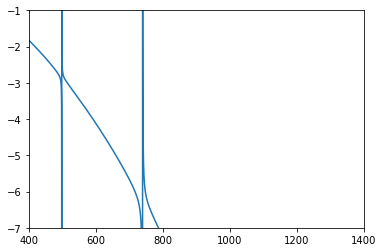

j1nz is
3.8317059702075125
In,,,,,


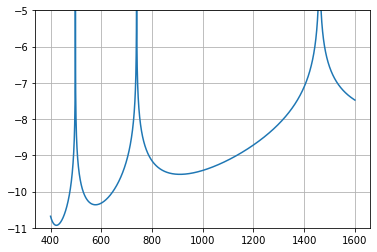

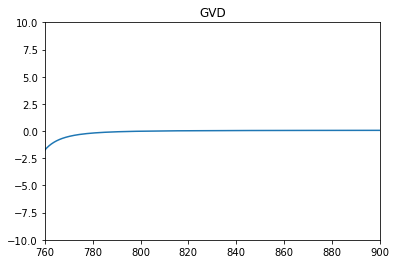

(0.997, 1.0)

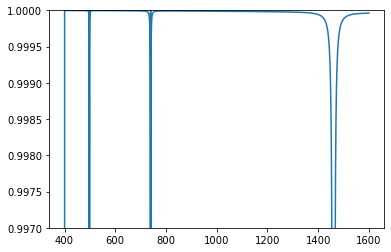

In [5]:
wavelengths = np.linspace(400, 1600, 10000)
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=80e-6,part="R")
plt.plot(wavelengths, (index - 1)*1e6)
plt.ylim([-7, -1])
plt.xlim([400, 1400])
plt.show()
loss = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=80e-6,part="I")
plt.plot(wavelengths, np.log10(loss))
plt.ylim([-11, -5])
plt.grid()
plt.show()
wavelengths = wavelengths
# plt.plot(wavelengths, index)
beta_HCF = beta_lambda(index, wavelengths)
GVD_HCF = GVD_lambda(beta_HCF, wavelengths)
plt.plot(wavelengths, np.array(GVD_HCF))
plt.title("GVD")
plt.ylim([-10, 10])
plt.xlim(760, 900)
plt.show()
plt.plot(wavelengths, np.array(Vg_lambda(beta_HCF, wavelengths)) / 3e17)
# plt.xlim(0.4e-6, 1.4e-6)
plt.ylim([0.9970, 1])

## <u> Gas modelling </u>

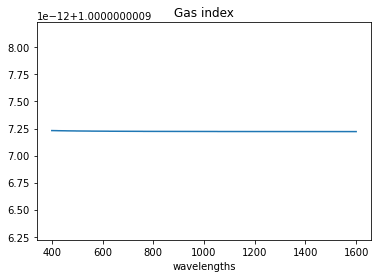

j1nz is
3.8317059702075125
[0.99999817 0.99999817 0.99999817 ... 0.99997167 0.99997167 0.99997166]


(0.09055, 0.09075)

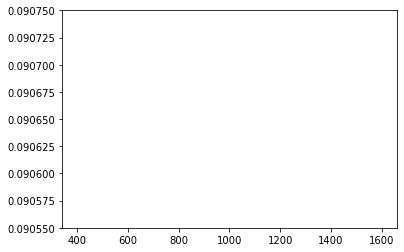

In [6]:
gas = lambda x: RefractiveIndexClass.RefractiveIndex.Gas(wavelengths = x, pressure = 0.01, temperature = 293, gas_name="Argon")
plt.plot(wavelengths, gas(wavelengths))
plt.title("Gas index")
plt.xlabel("wavelengths")
plt.show()
# Gas must have lower index than wall.
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=80e-6,part="R", n_gas= gas)
print(index)
plt.plot(wavelengths, (index - 1))
plt.ylim([90.55e-3, 90.75e-3])
# plt.show()

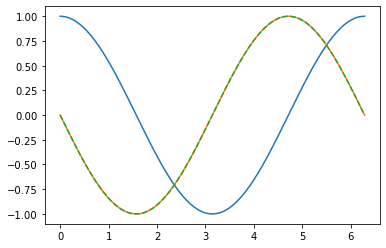

In [7]:
x = np.linspace(0, 2 * np.pi, 1000)
y = CDA2(np.sin(x), x[1] - x[0])
plt.plot(x, np.cos(x))
plt.plot(x, y)
plt.plot(x, -np.sin(x), '--')